# End to end example project
Here are the main steps we will walk through:

1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms.
5. Explore many different models and shortlist the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

## Look at the Big Picture
Welcome to the Machine Learning Housing Corporation! Your first task is to
use California census data to build a model of housing prices in the state.
This data includes metrics such as the population, median income, and
median housing price for each block group in California. Block groups are
the smallest geographical unit for which the US Census Bureau publishes
sample data (a block group typically has a population of 600 to 3,000
people). I will call them “districts” for short.
Your model should learn from this data and be able to predict the median
housing price in any district, given all the other metrics

## Frame The Problem
Knowing the objective is important because it will determine how you frame the problem, which algorithms you will select, which performance measure you will use to evaluate your model, and how much effort you will spend tweaking it.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Get the data
housing = pd.read_csv('./housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
print(housing.shape)
print(housing.info())
print(housing.describe())

(20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532  

In [8]:
# Founding out categories in ocean_proximity column
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

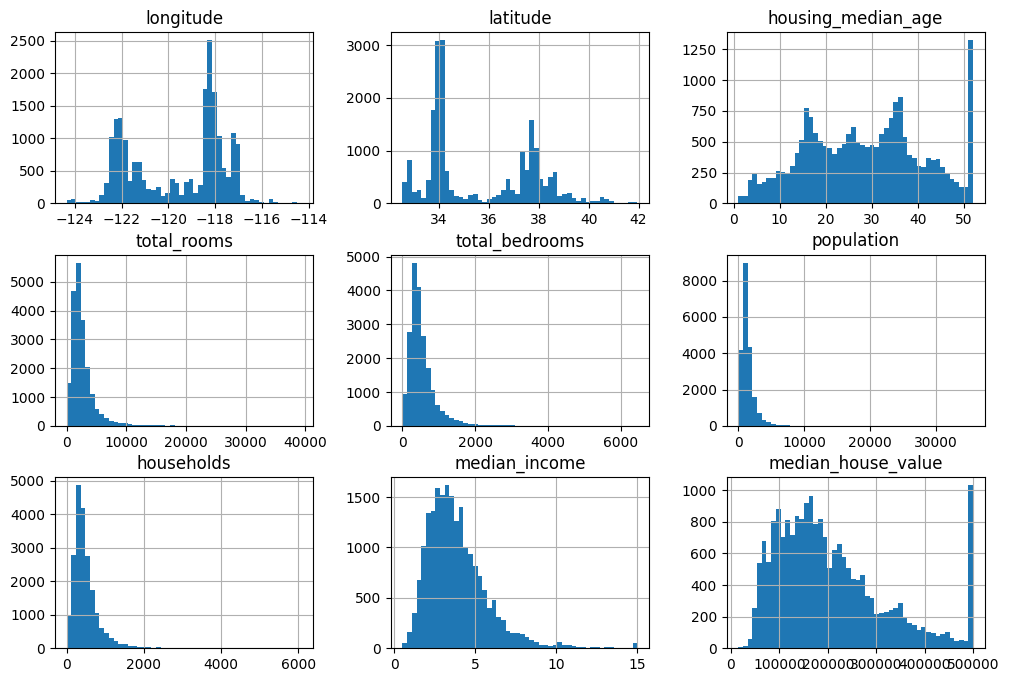

In [9]:
housing.hist(bins=50, figsize=(12,8))
plt.show()

In [19]:
train_set, test_set = train_test_split(housing, stratify=housing["income_category"],random_state=42, test_size=0.2)
len(test_set)

4128

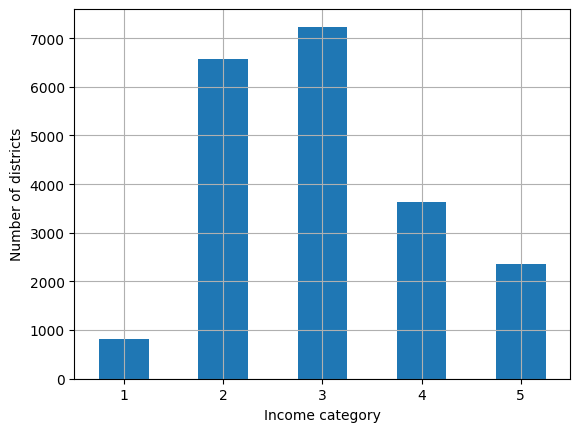

In [17]:
housing['income_category']= pd.cut(
    housing['median_income'], 
    bins=[0,1.5,3.0,4.5,6, np.inf],
    labels=[1,2,3,4,5]
)
housing["income_category"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

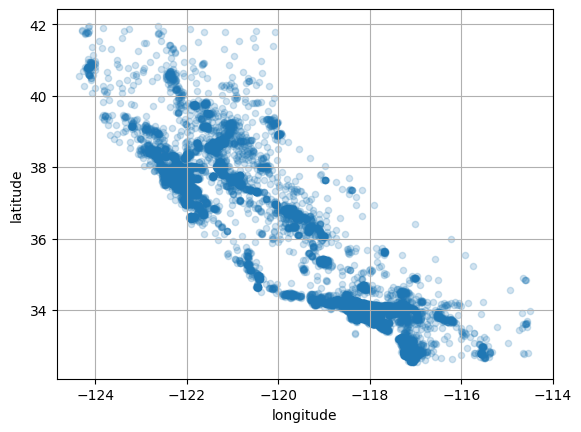

In [23]:
# Explore and Visualize the Data to Gain Insights
train_set.plot(kind='scatter', x='longitude', y='latitude', grid=True, alpha=0.2)
plt.show()